#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 11
**CH11B Are Australian weather forecasts well calibrated?**

using the australia-weather-forecasts dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import statsmodels.formula.api as smf


warnings.filterwarnings("ignore")


In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/australia-weather-forecasts/clean"
data_out = dirname + "da_case_studies/ch11-australia-rainfall-predict/"
output = dirname + "da_case_studies/ch11-australia-rainfall-predict/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:
data = pd.read_csv(os.path.join("/workspaces/codespaces-jupyter/data/rainfall_australia.csv"))
data = data.loc[
    (data["station_name"] == "DARWIN AIRPORT") & (data["bd_FC_Before_Start"] == 39)
]


In [4]:
data["rain_prob_fc"] = data["prob"] / 100

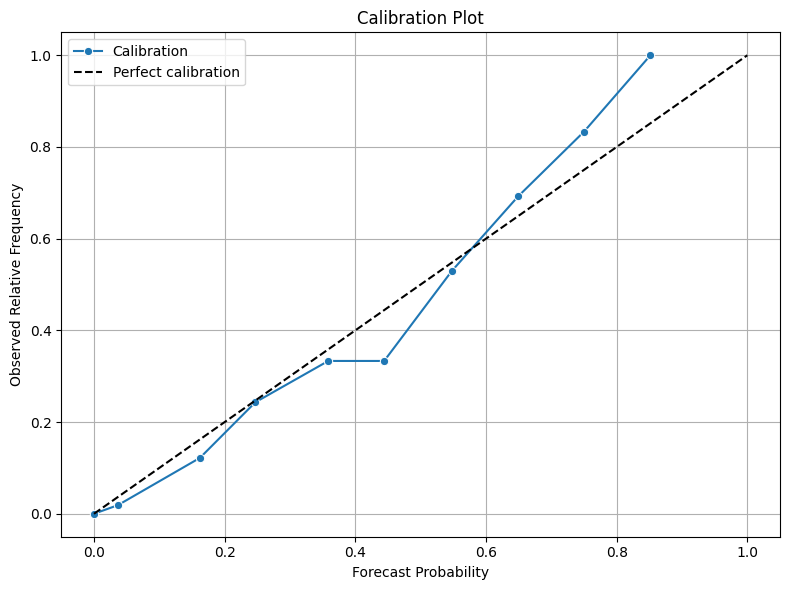

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bin the forecast probabilities
data['prob_bin'] = pd.cut(
    data['rain_prob_fc'],
    bins=np.array([0, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
    include_lowest=True
)

# Calculate mean forecast and mean actual for each bin
calib = data.groupby('prob_bin').agg(
    forecast_mean=('rain_prob_fc', 'mean'),
    actual_mean=('daily_sum', lambda x: np.mean(x > 0)),
    count=('prob_bin', 'size')
).reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='forecast_mean', y='actual_mean', data=calib, marker='o', label='Calibration')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect calibration')
plt.xlabel('Forecast Probability')
plt.ylabel('Observed Relative Frequency')
plt.title('Calibration Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ch11-figure-6-weather-calib.png")
plt.show()


In [6]:
data["rain_prob_fc"].describe()

count    350.000000
mean       0.214600
std        0.230993
min        0.000000
25%        0.010000
50%        0.145000
75%        0.360000
max        0.880000
Name: rain_prob_fc, dtype: float64